In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [3]:
# tokenization is the process of splitting text into individual words or tokens. 
from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
# pad_sequences helps ensure that all sequences have the same length by adding padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
# allows you to build a neural network by stacking multiple layers sequentially. 
from tensorflow.keras.models import Sequential
# Dense:every neuron in the layer is connected to all the neurons in the previous layer.
# Embedding layer maps each word in the input text to a corresponding dense vector
#  LSTMs can capture long-range dependencies in the input sequences by using a memory cell
# and various gates to control the flow of information.
# Convolutional layers are commonly used in computer vision tasks
# Maxpool is a down-sampling operation that reduces the spatial sizeof the input, retaining the important features.
from tensorflow.keras.layers import Dense,Embedding,LSTM,Conv1D,MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

# Exploring Fake News

In [5]:
fake=pd.read_csv('Fake.csv')

In [6]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


<AxesSubplot:xlabel='subject', ylabel='count'>

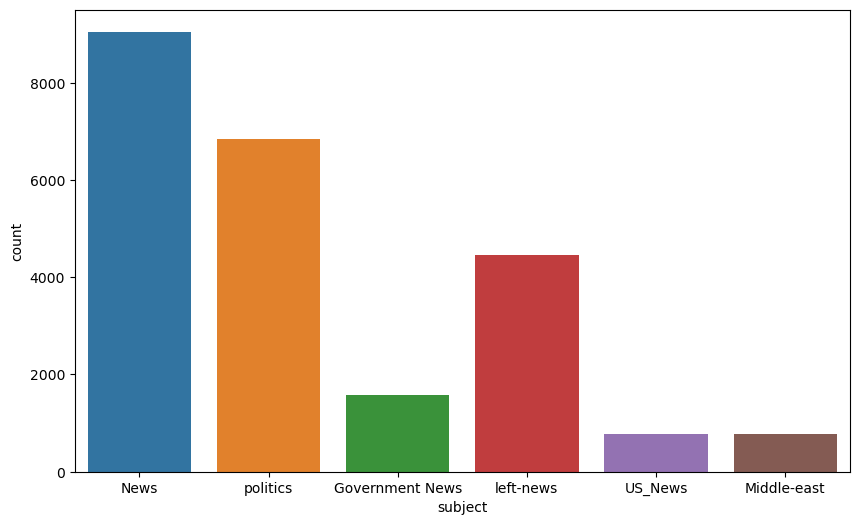

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=fake)

# Wordcloud

In [8]:
text=' '.join(fake['text'].tolist())

In [9]:
' '.join(['this','is','a','list'])

'this is a list'

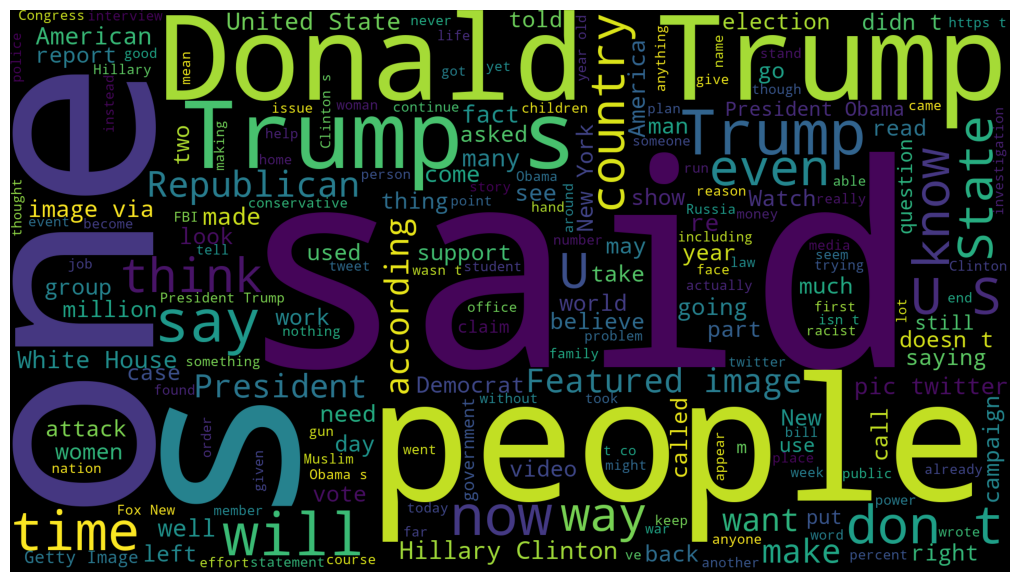

In [10]:
wordcloud=WordCloud(width=1920,height=1080).generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Exploring Real News

In [11]:
real=pd.read_csv('True.csv')

In [12]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


<AxesSubplot:xlabel='subject', ylabel='count'>

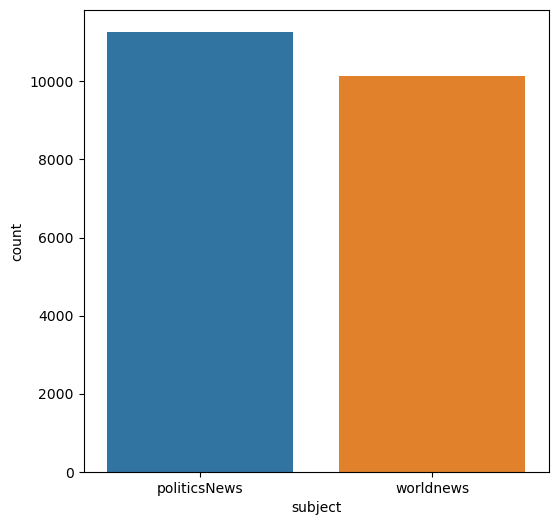

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='subject',data=real)

In [14]:
text=' '.join(real['text'].tolist())

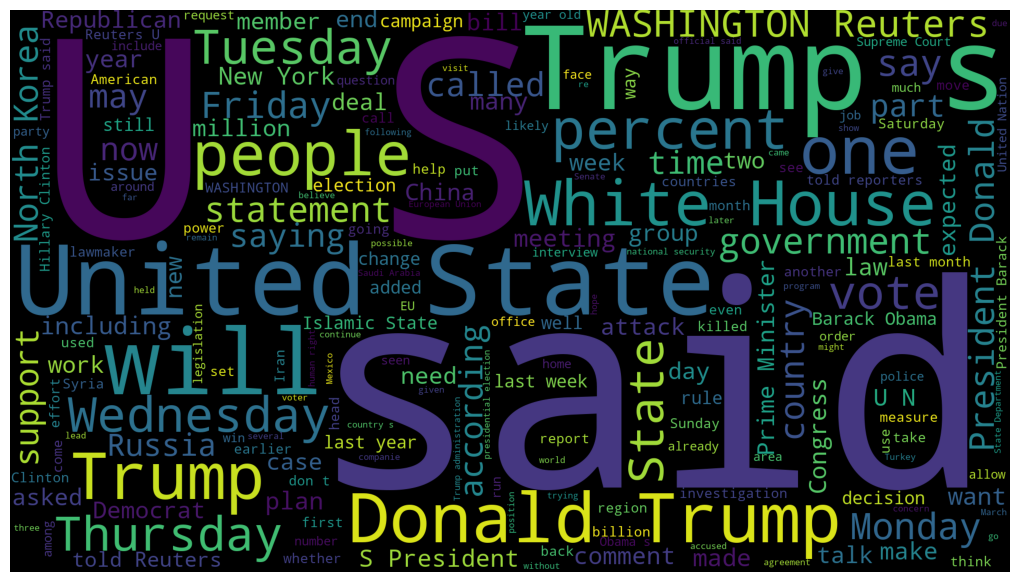

In [15]:
wordcloud=WordCloud(width=1920,height=1080).generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Cleaning Data

In [16]:
# reuter &'-' it shows the news is from twitter
real.sample(5)

,title,text,subject,date
8290,Hispanic backers sour on Trump after immigrati...,"WILMINGTON, Ohio/WASHINGTON (Reuters) - Some o...",politicsNews,"September 1, 2016"
10666,Obama says cautious about expectations for Syr...,WASHINGTON (Reuters) - U.S. President Barack O...,politicsNews,"February 24, 2016"
11001,Republican Cruz apologizes for email implying ...,WASHINGTON (Reuters) - U.S. Republican preside...,politicsNews,"February 2, 2016"
14366,Lebanon's president rejects terrorism suggestion,BEIRUT (Reuters) - The Lebanese president appe...,worldnews,"November 20, 2017"
6971,Senator warns against simultaneous overhaul of...,WASHINGTON (Reuters) - A senior U.S. Senate Re...,politicsNews,"December 1, 2016"


In [17]:
unknown_publisher=[]
for index,row in enumerate(real.text.values):
    try:
        record=row.split('-',maxsplit=1)
        record[1]
        assert(len(record[0])<120)# the length for twitter news text is less than 260
    except:
        unknown_publisher.append(index)


In [18]:
real.iloc[unknown_publisher].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [19]:
len(unknown_publisher)

222

In [20]:
real=real.drop(8970,axis=0)

In [21]:
publisher=[]
tmp_txt=[]
for index,row in enumerate(real.text.values):
    if index in unknown_publisher:
        tmp_txt.append(row)
        publisher.append('Unknown')
    else:
        record=row.split('-',maxsplit=1)
        publisher.append(record[0].strip())
        tmp_txt.append(record[1].strip())


In [22]:
real['publisher']=publisher

In [23]:
real['text']=tmp_txt

In [24]:
real

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,worldnews,"August 22, 2017",BRUSSELS (Reuters)
21413,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",worldnews,"August 22, 2017",LONDON (Reuters)
21414,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,worldnews,"August 22, 2017",MINSK (Reuters)
21415,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,worldnews,"August 22, 2017",MOSCOW (Reuters)


In [25]:
real[real['publisher']=='Unknown']

,title,text,subject,date,publisher
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",Unknown
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",Unknown
12,Factbox: Trump on Twitter (Dec 28) - Vanity Fa...,The following statements were posted to the ve...,politicsNews,"December 28, 2017",Unknown
13,"Trump on Twitter (Dec 27) - Trump, Iraq, Syria",The following statements were posted to the ve...,politicsNews,"December 28, 2017",Unknown
14,Man says he delivered manure to Mnuchin to pro...,"(In Dec. 25 story, in second paragraph, corre...",politicsNews,"December 25, 2017",Unknown
...,...,...,...,...,...
20136,Peru's Kuczynski dares Congress to dismiss ent...,LIMA (Reuters) - The government of Peru s Pres...,worldnews,"September 13, 2017",Unknown
20501,"Weeks after row over academic articles, China ...",BEIJING (Reuters) - Chinese importers of forei...,worldnews,"September 8, 2017",Unknown
20668,"Hurricane, storm surge warnings issued for Flo...","(Reuters) - Hurricane Irma, one of the most po...",worldnews,"September 8, 2017",Unknown
21247,British princes mark anniversary of Diana's de...,LONDON (Reuters) - Princes William and Harry p...,worldnews,"August 29, 2017",Unknown


In [26]:
empty_fake=[index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [27]:
fake.iloc[empty_fake]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [28]:
real['text']=real['title']+" "+real['text']
fake['text']=fake['title']+" "+fake['text']

In [29]:
real['text']=real['text'].apply(lambda x:str(x).lower())
fake['text']=fake['text'].apply(lambda x:str(x).lower())

In [30]:
real['class']=1
fake['class']=0

In [31]:
real=real[['text','class']]
fake=fake[['text','class']]

In [32]:
real.head()

,text,class
0,"as u.s. budget fight looms, republicans flip t...",1
1,u.s. military to accept transgender recruits o...,1
2,senior u.s. republican senator: 'let mr. muell...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge 'much mor...,1


In [33]:
fake.head()

,text,class
0,donald trump sends out embarrassing new year’...,0
1,drunk bragging trump staffer started russian ...,0
2,sheriff david clarke becomes an internet joke...,0
3,trump is so obsessed he even has obama’s name...,0
4,pope francis just called out donald trump dur...,0


In [34]:
data=pd.concat([real,fake])

In [35]:
data.sample(5)

,text,class
14755,muslim activists launch voter registration dri...,0
14001,regional african body says ready to work close...,1
13993,heartwarming: support for socialism on college...,0
3865,on the anniversary of the berlin wall coming ...,0
5128,another prominent republican declares: ‘i wil...,0


In [36]:
import preprocess_kgptalkie as ps

In [37]:
data['text']=data['text'].apply(lambda x:ps.remove_special_chars(x))

In [38]:
# convert text data into numeric by vectorization
import gensim

In [39]:
y=data['class'].values

In [40]:
X=[d.split() for d in data['text'].tolist()]

In [41]:
DIM=100
w2v_model=gensim.models.Word2Vec(sentences=X, vector_size=DIM, window=10,min_count=1)

In [42]:
len(w2v_model.wv.key_to_index)

231872

In [43]:
token=Tokenizer()
token.fit_on_texts(X)

In [44]:
X=token.texts_to_sequences(X)

In [45]:
token.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

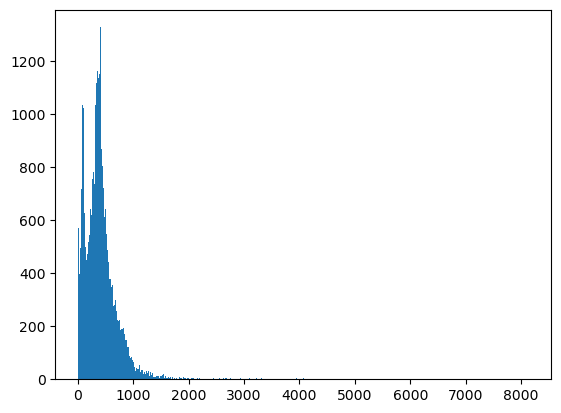

In [46]:
plt.hist([len(x) for x in X],bins=700)
plt.show()

In [47]:
maxlen=1000
X=pad_sequences(X,maxlen=maxlen)

In [48]:
vocab_size=len(token.word_index)+1
vocab=token.word_index

In [49]:
def get_weight_matrix(model):
    weight_matrix=np.zeros((vocab_size,DIM))
    for word,i in vocab.items():
        weight_matrix[i]=model.wv[word]
    return weight_matrix
        

In [50]:
embedding_vectors=get_weight_matrix(w2v_model)

In [51]:
embedding_vectors.shape

(231873, 100)

In [52]:
model=Sequential()
model.add(Embedding(vocab_size,output_dim=DIM,weights=[embedding_vectors],input_length=maxlen,trainable=False))

In [53]:
model.add(LSTM(units=128))

In [54]:
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23187300  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23,304,677
Trainable params: 117,377
Non-trainable params: 23,187,300
_________________________________________________________________


In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [ ]:
# Epoch is an important concept in machine learning that is used to measure the number of complete passes
# of all training data when training a neural network. 
#It is the number of times that all of the training data is used to update the weights of the neural network.

In [57]:
model.fit(X_train,y_train,validation_split=0.3,epochs=6)

Epoch 1/6
737/737 [==============================] - 1693s 2s/step - loss: 0.1446 - acc: 0.9451 - val_loss: 0.0823 - val_acc: 0.9729
Epoch 2/6
737/737 [==============================] - 1401s 2s/step - loss: 0.0665 - acc: 0.9777 - val_loss: 0.0415 - val_acc: 0.9871
Epoch 3/6
737/737 [==============================] - 1440s 2s/step - loss: 0.0380 - acc: 0.9884 - val_loss: 0.0377 - val_acc: 0.9886
Epoch 4/6
737/737 [==============================] - 1363s 2s/step - loss: 0.0224 - acc: 0.9931 - val_loss: 0.0320 - val_acc: 0.9892
Epoch 5/6
737/737 [==============================] - 1443s 2s/step - loss: 0.0199 - acc: 0.9938 - val_loss: 0.0282 - val_acc: 0.9913
Epoch 6/6
737/737 [==============================] - 1464s 2s/step - loss: 0.0104 - acc: 0.9967 - val_loss: 0.0244 - val_acc: 0.9936


In [58]:
y_pred=(model.predict(X_test)>=0.5).astype(int)
accuracy_score(y_test,y_pred)

351/351 [==============================] - 250s 660ms/step


0.9927839643652562

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5865
           1       0.99      0.99      0.99      5360

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [62]:
x=['Titan’s mission was expected to be the only manned trip to the Titanic this year due to bad weather, Harding wrote in on Instagram beforehand.']
x=token.texts_to_sequences(x)
x=pad_sequences(x,maxlen=maxlen)
x

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [63]:
n=(model.predict(x)>=0.5).astype(int)

1/1 [==============================] - 0s 216ms/step


In [64]:
if(n==0):
    print('Fake')
else:
    print('Real')

Real


In [65]:
x=['this is a news']
x=token.texts_to_sequences(x)
x=pad_sequences(x,maxlen=maxlen)
n=(model.predict(x)>=0.5).astype(int)
if(n==0):
    print('Fake')
else:
    print('Real')

1/1 [==============================] - 0s 189ms/step
Fake
